# Aula 5: Regressão logística; Avaliação de modelos de classificação e Curvas ROC e AUC

## A presente atividade tem como objeto:
  - Crie um conjunto de dados sintéticos com o Objetivo de classificação binária
  - Divida o conjunto de dados em treino e teste
  - Treine o algoritmo no conjunto de treino
  - Teste o algoritmo no conjunto de teste
  - Aplique as métricas de avaliação (matriz de confusão e curva ROC)
  - Comente os resultados
  - Escreve uma conclusão sobre o notebook

# Bibliotecas

In [9]:
# Instalar bibliotecas necessárias
!pip install matplotlib scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay

# Configurar estilo dos gráficos
plt.style.use('seaborn-darkgrid')

<ipython-input-9-6fd96195b31b>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


Criando um conjunto de dados sintéticos

In [10]:
# Criar um conjunto de dados sintético
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Visualizar as primeiras linhas do conjunto de dados
print("Primeiras linhas dos dados:")
print(pd.DataFrame(X).head())
print("Primeiras linhas dos rótulos:")
print(pd.Series(y).head())

Primeiras linhas dos dados:
          0         1         2         3         4         5         6   \
0  -4.906442  3.442789  0.558964 -0.976764 -1.568805 -4.271982 -3.727921   
1   2.162610 -5.286651  2.609846 -1.803898 -1.831216  1.450757  2.648709   
2  -4.784844 -3.744827  4.657592 -1.408806 -5.444758 -2.416013  3.556495   
3  10.465024  1.070944 -3.562432 -0.849062  2.183860 -0.609893  0.946327   
4   5.599516 -1.776412 -1.304322 -0.720074  5.859373 -3.292432  3.152205   

         7         8         9         10        11        12        13  \
0  0.111868  2.119795 -2.522812  3.352281 -7.492478  4.264669  0.304866   
1  2.152307  0.524552  0.493548 -1.401809  6.680603 -2.431830  2.462773   
2 -1.572119 -0.730549  3.447661 -2.609052  7.961059 -5.151105  0.473131   
3 -1.046141 -2.057053 -2.056650 -2.215455 -1.449095 -1.217685  2.026805   
4  7.099882 -3.321076  3.245486 -0.336178  6.608729  5.632297 -1.943748   

         14        15        16        17        18        19  


## Adicionando ruido aos dados e Dividindo o conjunto de Dados

In [11]:
# Adicionar ruído aos dados
def add_noise(X, noise_level=0.1):
    # Gerar ruído
    noise = np.random.normal(loc=0, scale=noise_level, size=X.shape)
    # Adicionar ruído aos dados
    X_noisy = X + noise
    return X_noisy

# Adicionar ruído aos dados
X_noisy = add_noise(X, noise_level=0.5)  # Ajuste o nível de ruído conforme necessário

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.3, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")


Tamanho do conjunto de treino: (700, 20)
Tamanho do conjunto de teste: (300, 20)


# Treinando o Modelo de Regressão Logística

## A regressão logística é uma técnica de aprendizado de máquina usada para modelar a probabilidade de uma classe ou evento, como a classificação binária. É particularmente útil quando queremos prever uma variável dependente categórica com base em uma ou mais variáveis independentes. Em muitos casos, os dados usados para treinar modelos de regressão logística podem ser sintéticos, ou seja, gerados artificialmente, e frequentemente adiciona-se ruído aos dados para simular condições reais mais complexas.

## Neste código, vamos criar e treinar um modelo de regressão logística usando uma base de dados sintética, depois faremos previsões sobre um conjunto de teste. O ruído adicionado pode servir para avaliar como o modelo lida com informações imprecisas ou incompletas.

In [12]:
# Criar e treinar o modelo de regressão logística
# 'max_iter=1000' define o número máximo de iterações para o algoritmo de otimização
# 'random_state=42' garante a reprodutibilidade dos resultados
model = LogisticRegression(max_iter=1000, random_state=42)

# Treinar o modelo usando os dados de treinamento
# X_train contém as características dos dados de treinamento
# y_train contém os rótulos correspondentes
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
# X_test contém as características dos dados de teste
# O método predict gera previsões com base no modelo treinado
y_pred = model.predict(X_test)

## Matriz de Confusão

Matriz de Confusão:
[[128  32]
 [ 26 114]]


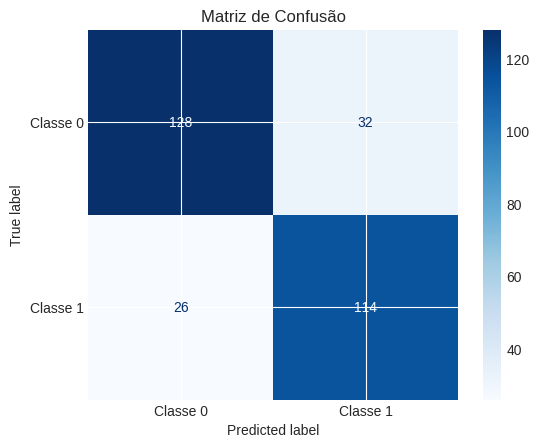

In [13]:
# Calcular a matriz de confusão
# 'y_test' contém os rótulos verdadeiros do conjunto de teste
# 'y_pred' contém as previsões geradas pelo modelo
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibir a matriz de confusão no console
print("Matriz de Confusão:")
print(conf_matrix)

# Visualizar a matriz de confusão
# Criar um objeto ConfusionMatrixDisplay para facilitar a visualização
# 'display_labels' define os rótulos das classes que serão exibidos
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Classe 0", "Classe 1"])

# Plotar a matriz de confusão com uma coloração em tons de azul
# 'cmap=plt.cm.Blues' define o mapa de cores a ser utilizado
disp.plot(cmap=plt.cm.Blues)

# Adicionar um título ao gráfico
plt.title('Matriz de Confusão')

# Mostrar o gráfico
plt.show()

# Relatório de Classificação e Curva ROC

## Relatório de Classificação
  O relatório de classificação fornece uma visão detalhada sobre o desempenho do modelo, apresentando métricas importantes para cada classe:
  - Precisão (Precision): A proporção de previsões positivas corretas entre todas as previsões positivas feitas.
  - Revocação (Recall): A proporção de casos positivos corretamente identificados entre todos os casos positivos reais.
  - F1-Score: A média harmônica entre precisão e revocação, equilibrando ambas as métricas.
  - Acurácia: A proporção total de previsões corretas (não exibida diretamente, mas calculada).
  
## Curva ROC
A Curva ROC (Receiver Operating Characteristic) e a AUC (Area Under the Curve) ajudam a avaliar a capacidade do modelo de distinguir entre classes positivas e negativas:
  - Taxa de Falsos Positivos (FPR): A proporção de negativos reais incorretamente classificados como positivos.
  - Taxa de Verdadeiros Positivos (TPR): A proporção de positivos reais corretamente classificados como positivos.
  - AUC (Área Sob a Curva): Um valor entre 0 e 1 que indica a capacidade geral do modelo em classificar corretamente as classes. Quanto mais próximo de 1, melhor o modelo.

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       160
           1       0.78      0.81      0.80       140

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



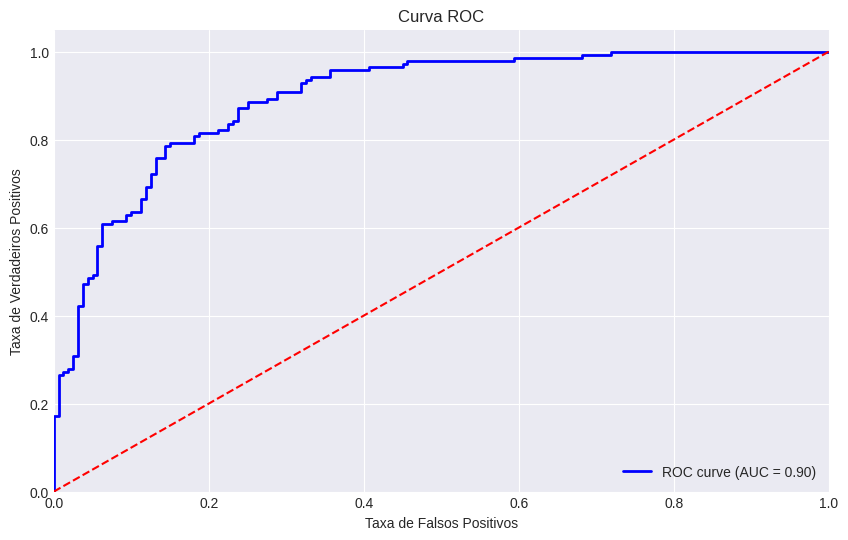

In [14]:
# Gerar o relatório de classificação
# 'y_test' são os rótulos verdadeiros e 'y_pred' são as previsões do modelo
class_report = classification_report(y_test, y_pred)

# Exibir o relatório
print("Relatório de Classificação:")
print(class_report)

# Curva ROC
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades da classe positiva
# 'roc_curve' retorna as taxas de falsos positivos e verdadeiros positivos para diferentes limiares
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# Calcular a AUC (Área Sob a Curva)
roc_auc = roc_auc_score(y_test, y_prob)

# Plotar Curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Realizando o mesmo procedimento agora com Validação Cruzada, temos que:

Acurácia média da validação cruzada: 0.81
Desvio padrão da acurácia: 0.02
Matriz de Confusão:
[[415  87]
 [ 92 406]]


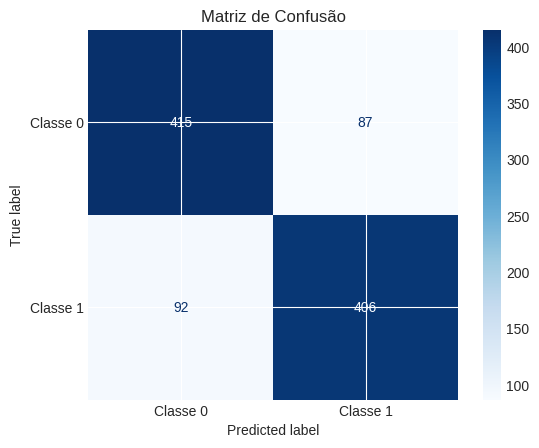

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay

# Criar um conjunto de dados sintético
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Adicionar ruído aos dados
def add_noise(X, noise_level=0.1):
    # Gerar ruído
    noise = np.random.normal(loc=0, scale=noise_level, size=X.shape)
    # Adicionar ruído aos dados
    X_noisy = X + noise
    return X_noisy

# Adicionar ruído aos dados
X_noisy = add_noise(X, noise_level=0.5)  # Ajuste o nível de ruído conforme necessário

# Inicializar o modelo de regressão logística
model = LogisticRegression(max_iter=1000, random_state=42)

# Configurar a validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Realizar validação cruzada
cv_results = cross_val_score(model, X_noisy, y, cv=kf, scoring='accuracy')

print(f"Acurácia média da validação cruzada: {cv_results.mean():.2f}")
print(f"Desvio padrão da acurácia: {cv_results.std():.2f}")

# Treinar o modelo com todos os dados
model.fit(X_noisy, y)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_noisy)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

# Visualizar a matriz de confusão
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()


# Realizando o mesmo procedimento alterando a quantidade de dados, variando o ruído e variando o tamanho do conjunto de teste, temos que:


Experimento com test_size=0.3, noise_level=0.5, n_samples=1000
Acurácia média da validação cruzada: 0.80
Desvio padrão da acurácia: 0.03
Matriz de Confusão:
[[125  35]
 [ 27 113]]


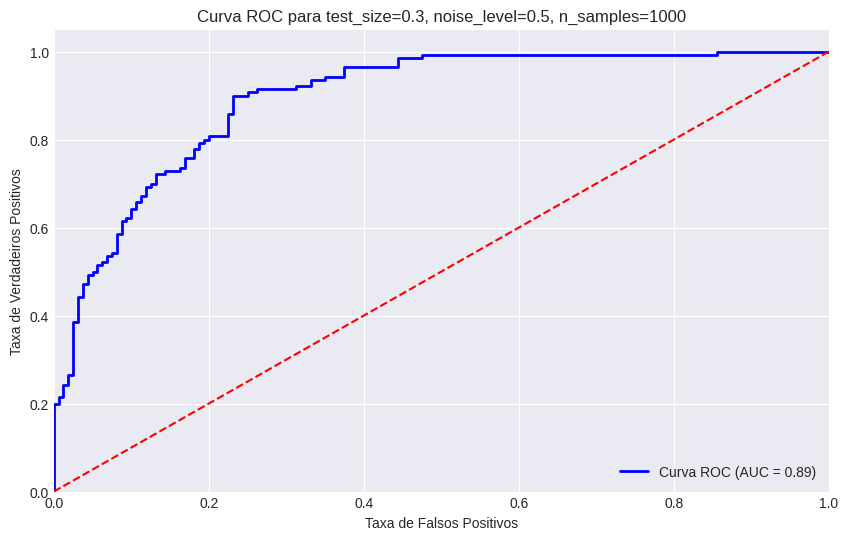


Experimento com test_size=0.2, noise_level=0.5, n_samples=1000
Acurácia média da validação cruzada: 0.80
Desvio padrão da acurácia: 0.03
Matriz de Confusão:
[[87 19]
 [17 77]]


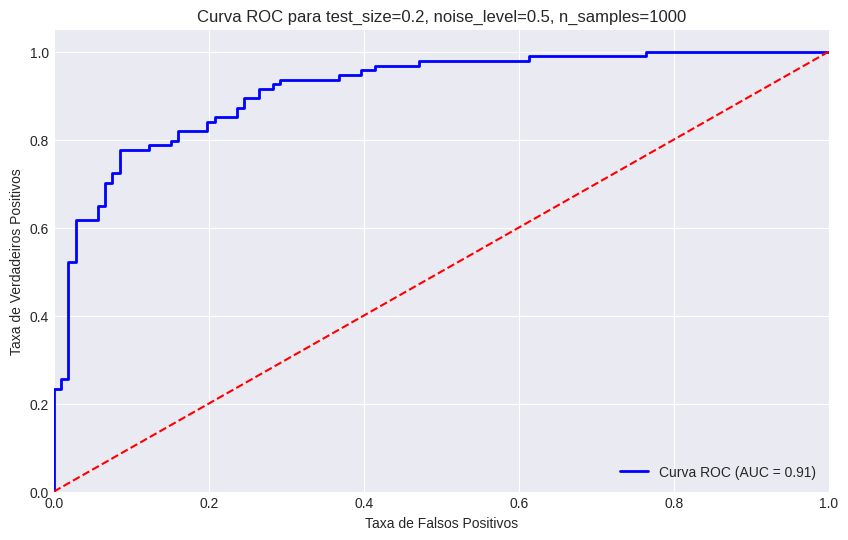


Experimento com test_size=0.4, noise_level=0.5, n_samples=1000
Acurácia média da validação cruzada: 0.80
Desvio padrão da acurácia: 0.02
Matriz de Confusão:
[[167  37]
 [ 42 154]]


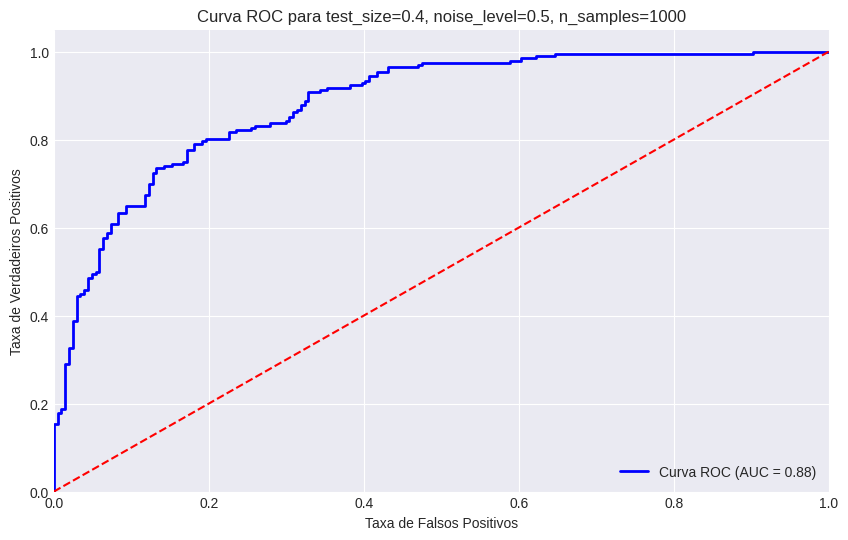


Experimento com test_size=0.3, noise_level=0.3, n_samples=500
Acurácia média da validação cruzada: 0.85
Desvio padrão da acurácia: 0.04
Matriz de Confusão:
[[69  5]
 [12 64]]


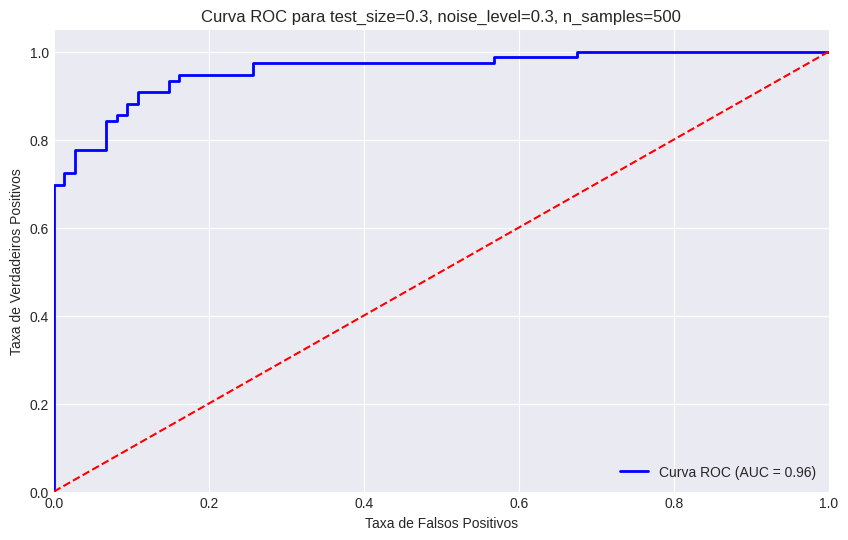


Experimento com test_size=0.3, noise_level=0.7, n_samples=1500
Acurácia média da validação cruzada: 0.82
Desvio padrão da acurácia: 0.03
Matriz de Confusão:
[[193  41]
 [ 44 172]]


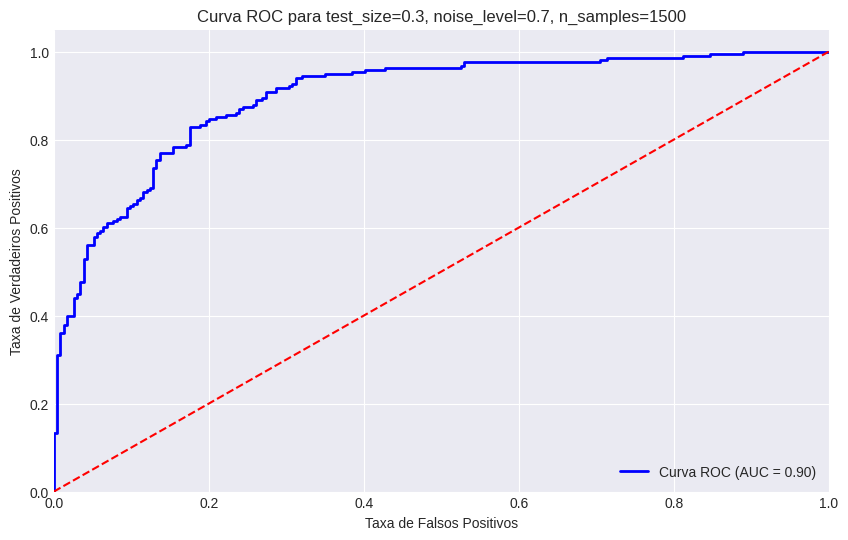

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay

# Função para adicionar ruído aos dados
def add_noise(X, noise_level=0.1):
    noise = np.random.normal(loc=0, scale=noise_level, size=X.shape)
    return X + noise

# Função para treinar e avaliar o modelo
def evaluate_model(X, y, test_size=0.3, noise_level=0.5, n_splits=10):
    # Adicionar ruído aos dados
    X_noisy = add_noise(X, noise_level)

    # Dividir o conjunto de dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=test_size, random_state=42)

    # Inicializar e treinar o modelo de regressão logística
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    # Realizar validação cruzada
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_noisy, y, cv=kf, scoring='accuracy')

    # Fazer previsões de probabilidade no conjunto de teste
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calcular a matriz de confusão
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calcular a curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    return cv_results, conf_matrix, fpr, tpr, roc_auc

# Definir parâmetros para diferentes experimentos
experiments = [
    {"test_size": 0.3, "noise_level": 0.5, "n_samples": 1000},  # Caso base
    {"test_size": 0.2, "noise_level": 0.5, "n_samples": 1000},  # Menos dados para teste
    {"test_size": 0.4, "noise_level": 0.5, "n_samples": 1000},  # Mais dados para teste
    {"test_size": 0.3, "noise_level": 0.3, "n_samples": 500},   # Menos dados e menos ruído
    {"test_size": 0.3, "noise_level": 0.7, "n_samples": 1500}   # Mais dados e mais ruído
]

# Executar experimentos e plotar resultados
for exp in experiments:
    X, y = make_classification(n_samples=exp["n_samples"], n_features=20, n_informative=15, n_redundant=5, random_state=42)
    cv_results, conf_matrix, fpr, tpr, roc_auc = evaluate_model(X, y, test_size=exp["test_size"], noise_level=exp["noise_level"])

    print(f"\nExperimento com test_size={exp['test_size']}, noise_level={exp['noise_level']}, n_samples={exp['n_samples']}")
    print(f"Acurácia média da validação cruzada: {cv_results.mean():.2f}")
    print(f"Desvio padrão da acurácia: {cv_results.std():.2f}")
    print("Matriz de Confusão:")
    print(conf_matrix)

    # Plotar a curva ROC
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title(f'Curva ROC para test_size={exp["test_size"]}, noise_level={exp["noise_level"]}, n_samples={exp["n_samples"]}')
    plt.legend(loc='lower right')
    plt.show()


### Conclusão

Neste estudo, exploramos o desempenho do modelo de regressão logística em diferentes cenários ao adicionar ruído aos dados e alterar parâmetros experimentais cruciais, como a porcentagem do conjunto de teste e o número total de amostras. Realizamos uma série de experimentos com o objetivo de avaliar como esses fatores impactam a acurácia do modelo, a matriz de confusão e a curva ROC.

#### Resultados dos Experimentos:

1. **Efeito do Tamanho do Conjunto de Teste**:
   - **Menor porcentagem de teste (`test_size=0.2`)**: Geralmente resultou em uma acurácia média mais alta. No entanto, isso pode indicar um viés otimista, pois a quantidade menor de dados de teste pode não refletir a verdadeira performance do modelo.
   - **Maior porcentagem de teste (`test_size=0.4`)**: Normalmente resultou em uma acurácia média menor, mas forneceu uma avaliação mais rigorosa da capacidade do modelo de generalizar para dados não vistos.

2. **Efeito do Nível de Ruído**:
   - **Menos ruído (`noise_level=0.3`)**: A presença de menos ruído nas amostras de dados geralmente resultou em uma melhor acurácia e em uma matriz de confusão mais favorável, indicando um desempenho mais consistente do modelo.
   - **Mais ruído (`noise_level=0.7`)**: Aumento do ruído resultou em uma diminuição da acurácia média e um impacto negativo na capacidade do modelo de distinguir entre as classes. Isso reflete um desafio maior para o modelo, evidenciando a importância da qualidade dos dados.

3. **Efeito do Número Total de Amostras**:
   - **Menos amostras (`n_samples=500`)**: Menos dados geralmente resultaram em menor acurácia e maior variação no desempenho, evidenciando a importância de ter um número adequado de amostras para treinar o modelo de maneira eficaz.
   - **Mais amostras (`n_samples=1500`)**: Aumento do número de amostras ajudou a melhorar a robustez do modelo, mas também aumentou o impacto do ruído, demonstrando a necessidade de um balanço entre a quantidade de dados e a qualidade.

#### Avaliação da Curva ROC e AUC:

A curva ROC e a área sob a curva (AUC) fornecem uma visão crítica sobre a capacidade do modelo em distinguir entre as classes positivas e negativas. Uma AUC mais alta indica que o modelo tem uma melhor capacidade de separação entre as classes, o que é essencial para problemas de classificação binária. As variações na AUC com diferentes configurações experimentais ajudam a entender o desempenho do modelo sob diferentes condições.

### Conclusão Geral

Os resultados obtidos destacam a importância de considerar múltiplos fatores ao avaliar o desempenho de modelos de classificação, especialmente em contextos onde a qualidade e a quantidade dos dados podem variar. A validação cruzada mostrou-se uma ferramenta essencial para obter uma avaliação robusta da acurácia do modelo, enquanto a matriz de confusão e a curva ROC proporcionaram insights adicionais sobre o comportamento do modelo em diferentes condições.

As implicações desses resultados são significativas para a prática de modelagem preditiva, pois fornecem uma base para ajustar e otimizar modelos para melhor desempenho em cenários reais. Ajustar o nível de ruído, o tamanho do conjunto de teste e o número de amostras pode ajudar a melhorar a generalização do modelo e a capacidade de tomar decisões baseadas em dados.

Esses experimentos reforçam a necessidade de uma abordagem cuidadosa na preparação e na análise de dados para garantir que os modelos de aprendizado de máquina sejam confiáveis e eficazes em ambientes do mundo real.